#Option Pricing Models

##Explore three fundamental option pricing models:



*   Black-Scholes Model
*   Binomial Options Pricing Model
*   Monte Carlo Simulation

Understand the theory behind each model and implement them step-by-step. For the implementation,
use Python with libraries like NumPy and SciPy.



Introduction to Options

An option is a financial derivative that gives the holder the right, but not the obligation, to buy or sell an underlying asset at a specified price (strike price) before or at a specified date (expiration date).


Call Option: Right to buy

Put Option: Right to sell

Goal: Determine the fair price of an option using different pricing models.

##Black-Scholes Model

**Theory and Formula**

The Black-Scholes model provides a mathematical formula to calculate the theoretical price of European-style options.

Assumptions:

*   The stock price follows a geometric Brownian motion with constant drift and volatility.
*   No arbitrage opportunities.
*   Markets are frictionless (no transaction costs or taxes).
*   The risk-free interest rate is constant.

**Black-Scholes Formula for a Call Option:**


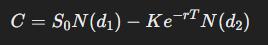

Where:

-C: Call option price

-𝑆:Current stock price

-K: Strike price

-T: Time to expiration (in years)

-r: Risk-free interest rate

-σ: Volatility of the underlying asset

-N(⋅): Cumulative distribution function of the standard normal distribution

-d1: (ln(S0/K)+(r+σ2/2)T) / (σ*sqrt(T))

-d2: d1 - (σ*sqrt(T))
​


##Python Implementation

In [ ]:
import numpy as np
from scipy.stats import norm

def black_scholes_call(S, K, T, r, sigma):
    """
    Calculate the Black-Scholes price for a European call option.

    Parameters:
    S : float
        Current stock price
    K : float
        Strike price
    T : float
        Time to expiration in years
    r : float
        Risk-free interest rate
    sigma : float
        Volatility of the underlying asset

    Returns:
    float
        Call option price
    """
    d1 = (np.log(S / K) + (r + sigma ** 2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Example usage:
S = 100    # Current stock price
K = 100    # Strike price
T = 1      # Time to expiration (1 year)
r = 0.05   # Risk-free interest rate (5%)
sigma = 0.2  # Volatility (20%)

call_price = black_scholes_call(S, K, T, r, sigma)
print(f"Black-Scholes Call Option Price: {call_price:.2f}")


Black-Scholes Call Option Price: 10.45


##Binomial Options Pricing Model
**Theory and Formula**

The binomial model uses a discrete-time framework to model the possible future stock prices over the option's life.

Key Concepts:

* Time Steps: Divide the time to expiration into 𝑁 intervals.
* Up and Down Factors:
  * u =e^(σ*sqrt(Δt))
​
  * de^(-σ*sqrt(Δt))
* Risk Neutral Probability:
  * p = (e^(rΔt) − d) / u - d

**Algorithm Steps:**
1.   Build a price tree for the underlying asset.
2.   Calculate the option value at each final node.
3.   Backward induction to determine the option price at the initial node.


##Python Implementation

In [ ]:
import numpy as np

def binomial_call(S, K, T, r, sigma, N):
    """
    Calculate the Binomial price for a European call option.

    Parameters:
    S : float
        Current stock price
    K : float
        Strike price
    T : float
        Time to expiration in years
    r : float
        Risk-free interest rate
    sigma : float
        Volatility of the underlying asset
    N : int
        Number of time steps

    Returns:
    float
        Call option price
    """
    dt = T / N  # Time step
    u = np.exp(sigma * np.sqrt(dt))  # Up factor
    d = 1 / u  # Down factor
    p = (np.exp(r * dt) - d) / (u - d)  # Risk-neutral probability

    # Initialize asset prices at maturity
    ST = np.array([S * (u ** j) * (d ** (N - j)) for j in range(N + 1)])

    # Initialize option values at maturity
    C = np.maximum(ST - K, 0)

    # Backward induction
    for i in range(N - 1, -1, -1):
        C = np.exp(-r * dt) * (p * C[1:] + (1 - p) * C[:-1])

    return C[0]

# Example usage:
N = 100  # Number of time steps

call_price_binomial = binomial_call(S, K, T, r, sigma, N)
print(f"Binomial Call Option Price: {call_price_binomial:.2f}")


Binomial Call Option Price: 10.43


##Monte-Carlo Simulation

**Theory and Steps**

Monte Carlo simulation estimates the option price by simulating the underlying asset's price paths.

Steps:

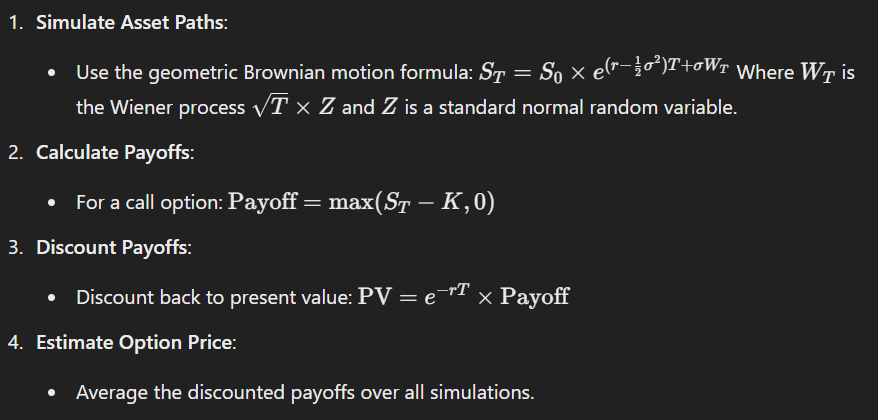

##Python Implementation

In [ ]:
import numpy as np

def monte_carlo_call(S, K, T, r, sigma, simulations):
    """
    Calculate the Monte Carlo price for a European call option.

    Parameters:
    S : float
        Current stock price
    K : float
        Strike price
    T : float
        Time to expiration in years
    r : float
        Risk-free interest rate
    sigma : float
        Volatility of the underlying asset
    simulations : int
        Number of Monte Carlo simulations

    Returns:
    float
        Call option price
    """
    # Generate random numbers
    Z = np.random.standard_normal(simulations)
    # Simulate end-of-period stock prices
    ST = S * np.exp((r - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * Z)
    # Calculate payoffs
    payoffs = np.maximum(ST - K, 0)
    # Discount payoffs back to present value
    call_price = np.exp(-r * T) * np.mean(payoffs)
    return call_price

# Example usage:
simulations = 100000

call_price_monte_carlo = monte_carlo_call(S, K, T, r, sigma, simulations)
print(f"Monte Carlo Call Option Price: {call_price_monte_carlo:.2f}")


Monte Carlo Call Option Price: 10.44


##Comparing the models

**Black-Scholes Price:** ~10.45

**Binomial Model Price:** ~10.43

**Monte Carlo Price:** ~10.44

###Observations

* All three models provide similar prices for European call options under the given parameters.
* Minor differences may arise due to the discretization in the binomial model and randomness in the Monte Carlo simulation.
* The Black-Scholes model is the fastest computationally but is limited to European options.
* The binomial model can be extended to American options by modifying the backward induction step.
* Monte Carlo simulation is flexible and can handle complex payoffs and multiple sources of uncertainty but is computationally intensive.



##Extending the Binomial Model to American Options

**American Options** allow the holder to exercise the option at any time up to and including the expiration date. This contrasts with **European Options**, which can only be exercised at expiration.

Implications for Pricing:

* The possibility of early exercise adds value to American options.
* Pricing American options requires checking at each node in the binomial tree whether early exercise is optimal.

### Adjustments to the Binomial Model

To price American options using the binomial model, we need to modify the backward induction step to consider the early exercise feature.

**Early Exercise Feature**

At each node during the backward induction, the option price is the maximum of:

The discounted expected future value (as in the European option).
The immediate exercise value.
Mathematically:

For a call option:

Adjustments to the Binomial Model
To price American options using the binomial model, we need to modify the backward induction step to consider the early exercise feature.

Early Exercise Feature
At each node during the backward induction, the option price is the maximum of:

The discounted expected future value (as in the European option).
The immediate exercise value.

**Mathematically:**

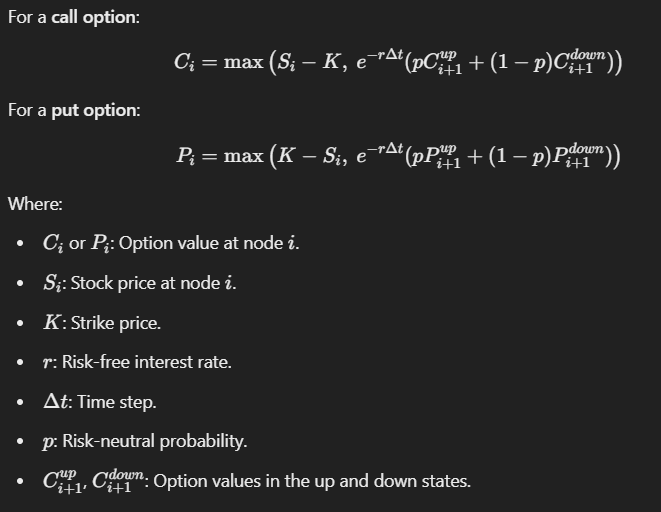

##Python Implementation

In [ ]:
import numpy as np

def binomial_american_option(S, K, T, r, sigma, N, option_type='call'):
    """
    Calculate the Binomial price for an American option.

    Parameters:
    S : float
        Current stock price
    K : float
        Strike price
    T : float
        Time to expiration in years
    r : float
        Risk-free interest rate
    sigma : float
        Volatility of the underlying asset
    N : int
        Number of time steps
    option_type : str
        'call' or 'put'

    Returns:
    float
        American option price
    """
    dt = T / N  # Time step
    u = np.exp(sigma * np.sqrt(dt))  # Up factor
    d = 1 / u  # Down factor
    p = (np.exp(r * dt) - d) / (u - d)  # Risk-neutral probability

    # Initialize asset prices at maturity
    ST = np.zeros(N + 1)
    ST[0] = S * d ** N
    for i in range(1, N + 1):
        ST[i] = ST[i - 1] * (u / d)

    # Initialize option values at maturity
    if option_type == 'call':
        option_values = np.maximum(ST - K, 0)
    else:
        option_values = np.maximum(K - ST, 0)

    # Backward induction
    for j in range(N - 1, -1, -1):
        for i in range(j + 1):
            option_values[i] = (
                np.exp(-r * dt) * (p * option_values[i + 1] + (1 - p) * option_values[i])
            )
            ST[i] = ST[i + 1] / u  # Moving to the previous stock price

            # Early exercise
            if option_type == 'call':
                option_values[i] = np.maximum(option_values[i], ST[i] - K)
            else:
                option_values[i] = np.maximum(option_values[i], K - ST[i])

    return option_values[0]


# Parameters
S = 100     # Current stock price
K = 100     # Strike price
T = 1       # Time to expiration (1 year)
r = 0.05    # Risk-free interest rate (5%)
sigma = 0.2 # Volatility (20%)
N = 100     # Number of time steps

# Price an American Call Option
american_call_price = binomial_american_option(S, K, T, r, sigma, N, option_type='call')
print(f"American Call Option Price: {american_call_price:.2f}")

# Price an American Put Option
american_put_price = binomial_american_option(S, K, T, r, sigma, N, option_type='put')
print(f"American Put Option Price: {american_put_price:.2f}")



American Call Option Price: 10.43
American Put Option Price: 6.08


## 3. Understanding the Greeks

### Introduction to the Greeks

The **Greeks** are measures of the sensitivity of the option's price to various factors:

- **Delta (Δ)**: Sensitivity to changes in the underlying asset's price.
- **Gamma (Γ)**: Sensitivity of delta to changes in the underlying asset's price.
- **Vega (ν)**: Sensitivity to changes in volatility.
- **Theta (Θ)**: Sensitivity to the passage of time.
- **Rho (ρ)**: Sensitivity to changes in the risk-free interest rate.

These Greeks help traders and risk managers understand how different variables affect the option's value. They are essential for hedging and risk management.




## The Primary Greeks

### Delta (Δ)

**Definition**:

Delta measures the rate of change of the option price with respect to changes in the underlying asset's price.

$$\Delta = \frac{\partial V}{\partial S}$$

Where \(V\) is the option price and \(S\) is the underlying asset price.

**Interpretation**:

- For **call options**, delta ranges from 0 to 1.
- For **put options**, delta ranges from -1 to 0.

A delta of 0.5 means that for every \$1 increase in the stock price, the option's price increases by approximately

\$0.50.



---

### Gamma (Γ)

**Definition**:

Gamma measures the rate of change of delta with respect to changes in the underlying asset's price.

$$\Gamma = \frac{\partial^2 V}{\partial S^2} = \frac{\partial \Delta}{\partial S}$$

**Interpretation**:

- Gamma indicates how quickly delta changes as the underlying price changes.
- High gamma means delta can change rapidly for small moves in the underlying price.
- Options close to the money and with shorter times to expiration typically have higher gamma.

---

### Vega (ν)

**Definition**:

Vega measures the rate of change of the option price with respect to changes in the volatility of the underlying asset.

$$\nu = \frac{\partial V}{\partial \sigma}$$

Where \(\sigma\) is the volatility.

**Interpretation**:

- Vega is always positive for both calls and puts.
- Higher volatility generally increases the value of options.
- Vega is larger for at-the-money options and for options with longer time to expiration.

---

### Theta (Θ)

**Definition**:

Theta measures the rate of change of the option price with respect to the passage of time.

$$\Theta = \frac{\partial V}{\partial t}$$

**Interpretation**:

- Theta is generally negative for long option positions (they lose value as time passes if everything else remains constant).
- As expiration approaches, time decay accelerates for at-the-money options.
- Shorter-dated options lose time value more quickly than longer-dated options.

---

### Rho (ρ)

**Definition**:

Rho measures the rate of change of the option price with respect to changes in the risk-free interest rate.

$$\rho = \frac{\partial V}{\partial r}$$

**Interpretation**:

- For **call options**, rho is positive (their value increases with interest rates).
- For **put options**, rho is negative (their value decreases as interest rates increase).
- Rho is generally less significant than delta, gamma, vega, or theta in most market environments.

### Calculating Greeks in the Black-Scholes Model

Under the Black-Scholes assumptions, we have closed-form expressions for the Greeks of European options.

**Definitions**:

- $S$: Current stock price  
- $K$: Strike price  
- $T$: Time to expiration  
- $r$: Risk-free interest rate  
- $\sigma$: Volatility  
- $d_1 = \frac{\ln(S/K) + (r + \sigma^2/2)T}{\sigma \sqrt{T}}$  
- $d_2 = d_1 - \sigma \sqrt{T}$  
- $N(\cdot)$: Cumulative distribution function of the standard normal distribution  
- $N'(\cdot)$: Probability density function of the standard normal distribution


#### Delta (Δ)

- **Call Option**:

  $$ \Delta_{\text{call}} = N(d_1) $$

- **Put Option**:

  $$ \Delta_{\text{put}} = N(d_1) - 1 $$

#### Gamma (Γ)

- Both call and put options have the same gamma:

  $$ \Gamma = \frac{N'(d_1)}{S \sigma \sqrt{T}} $$

#### Vega (ν)

- Both call and put options have the same vega:

  $$ \nu = S N'(d_1) \sqrt{T} $$

#### Theta (Θ)

- **Call Option**:

  $$ \Theta_{\text{call}} = -\frac{S N'(d_1) \sigma}{2 \sqrt{T}} - r K e^{-r T} N(d_2) $$

- **Put Option**:

  $$ \Theta_{\text{put}} = -\frac{S N'(d_1) \sigma}{2 \sqrt{T}} + r K e^{-r T} N(-d_2) $$

#### Rho (ρ)

- **Call Option**:

  $$ \rho_{\text{call}} = K T e^{-r T} N(d_2) $$

- **Put Option**:

  $$ \rho_{\text{put}} = -K T e^{-r T} N(-d_2) $$

### Alternative Methods to Compute the Greeks

When dealing with options that do not fit Black-Scholes assumptions (e.g., American or exotic options), or when no closed-form solutions exist, we can use numerical methods.

#### Finite Difference Methods

Approximate the Greeks by numerically estimating the partial derivatives. For example, for Delta:

$$ \Delta \approx \frac{V(S + \Delta S) - V(S - \Delta S)}{2 \Delta S} $$

Similarly, adjust parameters for Gamma, Vega, Theta, and Rho.

#### Binomial Options Pricing Model

Using the binomial model, Delta can be approximated as:

$$ \Delta \approx \frac{V_{\text{up}} - V_{\text{down}}}{S_{\text{up}} - S_{\text{down}}} $$

Further refinements yield approximations for Gamma and Theta.

#### Monte Carlo Simulation

For Monte Carlo simulations, methods such as the Pathwise Derivative Method or the Likelihood Ratio Method can be employed to estimate Greeks. These involve differentiating the payoff or adjusting the probability measure to understand how the option value changes with parameter shifts.

**Advantages of Alternative Methods**:
- Flexibility with complex payoffs and early exercise features.
- No closed-form solution required.

**Trade-Offs**:
- Computationally more intensive.
- Potentially more noise in the estimates.
- Need careful selection of step sizes for finite differences or number of simulations for Monte Carlo.

**Example Code (Black-Scholes Greeks)**:

In [1]:
import numpy as np
from scipy.stats import norm

def black_scholes_greeks(S, K, T, r, sigma, option_type='call'):
    d1 = (np.log(S / K) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    N_d1 = norm.cdf(d1)
    N_d2 = norm.cdf(d2)
    N_prime_d1 = norm.pdf(d1)

    # Delta
    if option_type == 'call':
        delta = N_d1
    else:
        delta = N_d1 - 1

    # Gamma (same for call and put)
    gamma = N_prime_d1 / (S * sigma * np.sqrt(T))

    # Vega (same for call and put)
    vega = S * N_prime_d1 * np.sqrt(T)

    # Theta
    if option_type == 'call':
        theta = (-S * N_prime_d1 * sigma / (2 * np.sqrt(T))
                 - r * K * np.exp(-r * T) * N_d2)
    else:
        theta = (-S * N_prime_d1 * sigma / (2 * np.sqrt(T))
                 + r * K * np.exp(-r * T) * norm.cdf(-d2))

    # Rho
    if option_type == 'call':
        rho = K * T * np.exp(-r * T) * N_d2
    else:
        rho = -K * T * np.exp(-r * T) * norm.cdf(-d2)

    # Convert Vega, Theta, and Rho to standard reporting units:
    # Vega per 1% volatility change, Theta per day, Rho per 1% interest rate change
    greeks = {
        'Delta': delta,
        'Gamma': gamma,
        'Vega': vega / 100,
        'Theta': theta / 365,
        'Rho': rho / 100
    }

    return greeks

# Example usage:
S = 100
K = 100
T = 1
r = 0.05
sigma = 0.2

call_greeks = black_scholes_greeks(S, K, T, r, sigma, option_type='call')
call_greeks

{'Delta': 0.6368306511756191,
 'Gamma': 0.018762017345846895,
 'Vega': 0.3752403469169379,
 'Theta': -0.01757267820941972,
 'Rho': 0.5323248154537634}